In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
def observe_data(x_data, y_data):
  file_path = f'/content/drive/MyDrive/Tensegrity_ML/phase_90/{x_data}.csv'
  x_70 = pd.read_csv(file_path)

  y_70 = pd.read_csv(f'/content/drive/MyDrive/Tensegrity_ML/phase_90/{y_data}.csv')
  Y_70 = y_70.iloc[4:, 2:5]
  Y_70.drop(Y_70.index[0], inplace=True) ##remove the first row which is header
  Y_70.reset_index(drop=True, inplace=True)


  data = x_70.to_numpy()
  y_temp = Y_70.to_numpy()
  labels = y_temp.astype(np.float)

  return data, labels

#new function to match features and target data
def equalizer(features, target):
  #np_features = features.to_numpy()
  #np_target = target.to_numpy()
  #np_target = np_target.astype(np.float)

  X_len = len(features)
  Y_len = len(target)
  samp_rate_matcher = X_len//Y_len

  features = features[::samp_rate_matcher].copy()
  features = pd.DataFrame(features)
  target = pd.DataFrame(target)

  if abs(X_len-Y_len)>0:
    features = features[:Y_len]
  else:
    pass
  features = features[:Y_len//2]
  target = target[:Y_len//2]
  return features, target


def removeNaN(arr):
  # Assuming arr is your numpy array
  # Create a copy to avoid modifying the original array
  arr_copy = np.copy(arr)

  # Iterate through the array and replace NaN values
  for i in range(1, arr.shape[0]-1):
    for j in range(arr.shape[1]):
        if np.isnan(arr[i, j]):
            # Check if at least one of the neighboring values is not NaN
            if not (np.isnan(arr[i-1, j]) and np.isnan(arr[i+1, j])):
                # Calculate mean of neighboring values
                mean_value = np.nanmean([x for x in [arr[i-1, j], arr[i+1, j]] if not np.isnan(x)])
                arr_copy[i, j] = mean_value
  return arr_copy
# arr_copy now contains the array with NaN values replaced by mean of neighboring values

def removeNaNIteratively(arr):
    while np.isnan(arr).any():
        arr = removeNaN(arr)
    return arr



features_70, target_70 = observe_data('phase_70_motor', 'optitrack_70')

# plt.plot(features_70[17800:31800])
# plt.plot(target_70[2200:4500])

features_70 = features_70[17800:32500]
target_70 = target_70[2200:4500]
# print(len(features_70))
# print(len(target_70))


features_80, target_80 = observe_data('phase_80_motor', 'optitrack_80')
# plt.plot(features_80[18400:32500])
# plt.plot(target_80[2200:4600])

features_80 = features_80[18400:32500]
target_80 = target_80[2200:4600]
# print(len(features_80))
# print(len(target_80))

features_90, target_90 = observe_data('phase_90_motor', 'optitrack_90')
# plt.plot(features_90[18600:32700])
# plt.plot(target_90[2150:4550])

features_90 = features_90[18600:32700]
target_90 = target_90[2150:4550]
# print(len(features_90))
# print(len(target_90))

features_100, target_100 = observe_data('phase_100_motor', 'optitrack_100')
# plt.plot(features_100[18400:32700])
# plt.plot(target_100[2200:4550])

features_100 = features_100[18400:32700]
target_100 = target_100[2200:4550]
# print(len(features_100))
# print(len(target_100))

features_110, target_110 = observe_data('phase_110_motor', 'optitrack_110')
# plt.plot(features_110[18200:32500])
# plt.plot(target_110[2150:4550])
features_110 = features_110[18200:32500]
target_110 = target_110[2150:4550]
# print(len(features_110))
# print(len(target_110))

features_120, target_120 = observe_data('phase_120_motor', 'optitrack_120')
#plt.plot(features_120[18500:33000])
# plt.plot(target_120[2150:4550])

features_120 = features_120[18500:33000]
target_120 = target_120[2150:4550]
# print(len(features_120))
# print(len(target_120))


features_130, target_130 = observe_data('phase_130_motor', 'optitrack_130')
# plt.plot(features_130[18500:32900])
# plt.plot(target_130[2200:4700])
features_130 = features_130[18500:32900]
target_130 = target_130[2200:4700]
# print(len(features_130))
# print(len(target_130))

features_140, target_140 = observe_data('phase_140_motor', 'optitrack_140')
# plt.plot(features_140[18400:32600])
# plt.plot(target_140[2100:4600])

features_140 = features_140[18400:32600]
target_140 = target_140[2100:4600]
# print(len(features_140))
# print(len(target_140))


features_150, target_150 = observe_data('phase_150_motor', 'optitrack_150')
# plt.plot(features_150[18300:32500])
# plt.plot(target_150[2200:4700])

features_150 = features_150[18300:32500]
target_150 = target_150[2200:4700]
# print(len(features_150))
# print(len(target_150))



features70_equal, target70_equal = equalizer(features_70, target_70)
# features70_equal = pd.DataFrame(features70_equal)
# target70_equal = pd.DataFrame(target70_equal)
print(len(features70_equal))
print(len(target70_equal))

features80_equal, target80_equal = equalizer(features_80, target_80)
# features80_equal = pd.DataFrame(features80_equal)
# target80_equal = pd.DataFrame(target80_equal)
print(len(features80_equal))
print(len(target80_equal))
features90_equal, target90_equal = equalizer(features_90, target_90)
# features90_equal = pd.DataFrame(features90_equal)
# target90_equal = pd.DataFrame(target90_equal)
print(len(features90_equal))
print(len(target90_equal))
features100_equal, target100_equal = equalizer(features_100, target_100)
# features100_equal = pd.DataFrame(features100_equal)
# target100_equal = pd.DataFrame(target100_equal)
print(len(features100_equal))
print(len(target100_equal))
features110_equal, target110_equal = equalizer(features_110, target_110)
# features110_equal = pd.DataFrame(features110_equal)
# target110_equal = pd.DataFrame(target110_equal)
print(len(features110_equal))
print(len(target110_equal))
features120_equal, target120_equal = equalizer(features_120, target_120)
# features120_equal = pd.DataFrame(features120_equal)
# target120_equal = pd.DataFrame(target120_equal)
print(len(features120_equal))
print(len(target120_equal))


features130_equal, target130_equal = equalizer(features_130, target_130)
# # features130_equal = pd.DataFrame(features130_equal)
# # target130_equal = pd.DataFrame(target130_equal)
# print(len(features130_equal))
# print(len(target130_equal))
features140_equal, target140_equal = equalizer(features_140, target_140)
# # features140_equal = pd.DataFrame(features140_equal)
# # target140_equal = pd.DataFrame(target140_equal)
# print(len(features140_equal))
# print(len(target140_equal))
features150_equal, target150_equal = equalizer(features_150, target_150)
# # features150_equal = pd.DataFrame(features150_equal)
# # target150_equal = pd.DataFrame(target150_equal)
# print(type(features150_equal))
# print(type(target150_equal))

<ipython-input-50-60353ae4cf98>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = y_temp.astype(np.float)
<ipython-input-50-60353ae4cf98>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = y_temp.astype(np.float)
<ipython-input-50-60353ae4cf98>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `floa

1150
1150
1200
1200
1200
1200
1175
1175
1200
1200
1200
1200


<ipython-input-50-60353ae4cf98>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = y_temp.astype(np.float)


<ipython-input-4-fc1307b1f21f>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = y_temp.astype(np.float)


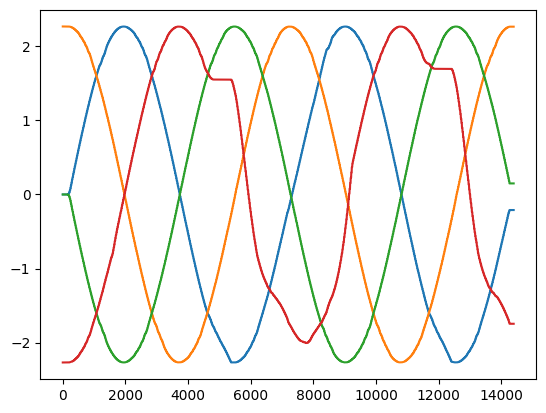

In [ ]:
features_130, target_130 = observe_data('phase_130_motor', 'optitrack_130')
# plt.plot(features_130[18500:32900])
# plt.plot(target_130[2200:4700])
features_130 = features_130[18500:32900]
target_130 = target_130[2200:4700]
plt.plot(features_130)
features130_equal, target130_equal = equalizer(features_130, target_130)

In [ ]:
##added features100_equal and features130_equal(it wasn't there also)
features_combined_df  = np.concatenate((features70_equal, features80_equal, features90_equal, features100_equal, features110_equal, features120_equal))
target_combined_df  = np.concatenate((target70_equal, target80_equal, target90_equal, target100_equal, target110_equal, target120_equal))
motor_combined_df = removeNaNIteratively(features_combined_df)
optitrack_combined_df = removeNaNIteratively(target_combined_df)


In [ ]:
true_xyz_df = np.copy(optitrack_combined_df)
true_xyz_df[:, -1], true_xyz_df[:,-2] = optitrack_combined_df[:,-2], optitrack_combined_df[:, -1]
real_xy_df = true_xyz_df[:, :-1]
real_xy_df
concat_optitrack_motor_df = np.concatenate((real_xy_df, motor_combined_df), axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_shuffled, x_valid_shuffled, y_train_shuffled, y_valid_shuffled = train_test_split(concat_optitrack_motor_df[:,:-4], concat_optitrack_motor_df[:,-4:], test_size=0.2, random_state=42)

In [ ]:
y_test_motor = [
    [31.327, -13.19, -31.348, 13.14],
    [-3.973, -44.827, 3.902, 44.834],
    [50.741, 5.172, -50.733, -5.253],
    [32.477, -53.958, -32.563, 53.906],
    [-70.514, 25.493, 70.555, -25.38],
    [-84.347, 21.256, 84.38, -21.121],
    [-70.224, -59.492, 70.129, 59.604],
    [-43.236, 93.452, 43.385, -93.383],
    [111.947, 3.538, -111.941, -3.716],
    [108.649, 46.124, -108.575, -46.297]
]


motor_radians = np.radians(y_test_motor)

#z is truly the height of the structure
X_raw_optitrack = [[-1.2908, 1.7913, 1.5519],
    [-1.2845, 1.7186, 1.5479],
    [-1.29593, 1.83497, 1.5518],
    [-1.2378, 1.759, 1.5517],
    [-1.4285, 1.6788, 1.5324],
    [-1.4353, 1.6548, 1.5295],
    [-1.3241, 1.6117, 1.5354],
    [-1.4906, 1.7757, 1.5283],
    [-1.2341, 1.9242, 1.5514],
    [-1.2906, 1.9545, 1.5474]]
X_raw_optitrack_swapped = [[row[0], row[1]] for row in X_raw_optitrack] #now it is data without z like the new model trained on
# Create the DataFrame
# X_test = pd.DataFrame(X_raw_optitrack)
# y_test = pd.DataFrame(motor_radians)

X_test_optitrack = np.array(X_raw_optitrack_swapped)
y_test_motor = motor_radians


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define a list of models
models = [
    ("Linear Regression", MultiOutputRegressor(LinearRegression())),
    ("Ridge", MultiOutputRegressor(Ridge(alpha = 10))),
    ("Support Vector Machine", MultiOutputRegressor(SVR()))
]

# Train and evaluate each model
results = []

for name, model in models:
    model.fit(X_train_shuffled, y_train_shuffled)
    val_score = model.score(x_valid_shuffled, y_valid_shuffled)
    # mse = mean_squared_error(y_valid_shuffled, y_pred)
    # r2 = r2_score(y_valid_shuffled, y_pred)
    print(f"{name} validation score: {val_score}")

    test_score = model.score(X_test_optitrack, y_test_motor)
    print(f"{name} test score: {test_score}")
    # r2_test = r2_score(y_test_motor, motor_angles_pred)
    # results.append((name, mse, r2, r2_test))

# Display results
# for name, mse, r2, r2_test in results:
#     print(f"{name} Mean Squared Error: {mse}; R2 for validation: {r2}; R2 for test: {r2_test}")

Linear Regression validation score: 0.9057132689629
Linear Regression test score: 0.8122872961902643
Ridge validation score: 0.8776103382921747
Ridge test score: 0.8607076738004341
Support Vector Machine validation score: 0.904255959760174
Support Vector Machine test score: 0.7966289042532226


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define a list of models
models = [
    ("Linear Regression", MultiOutputRegressor(LinearRegression())),
    ("Ridge", MultiOutputRegressor(Ridge(alpha = 10))),
    ("Support Vector Machine", MultiOutputRegressor(SVR()))
]

# Train and evaluate each model
results = []

for name, model in models:
    model.fit(X_train_shuffled, y_train_shuffled)
    y_pred = model.predict(x_valid_shuffled)
    mse = mean_squared_error(y_valid_shuffled, y_pred)
    r2 = r2_score(y_valid_shuffled, y_pred)

    motor_angles_pred = model.predict(X_test_optitrack)
    r2_test = r2_score(y_test_motor, motor_angles_pred)
    results.append((name, mse, r2, r2_test))

# Display results
for name, mse, r2, r2_test in results:
    print(f"{name} Mean Squared Error: {mse}; R2 for validation: {r2}; R2 for test: {r2_test}")

Linear Regression Mean Squared Error: 0.13161912271307832; R2 for validation: 0.9057132689629; R2 for test: 0.8122872961902643
Ridge Mean Squared Error: 0.1707065458317441; R2 for validation: 0.8776103382921747; R2 for test: 0.8607076738004341
Support Vector Machine Mean Squared Error: 0.13368313502613402; R2 for validation: 0.904255959760174; R2 for test: 0.7966289042532226


In [ ]:
motor_angles_pred = models[0][1].predict(X_test_optitrack)
print(motor_angles_pred)

[[ 0.1528291  -0.05531196 -0.15288679  0.06376588]
 [-0.37621688 -0.78015913  0.37622328  0.79182766]
 [ 0.45936147  0.39236714 -0.45945948 -0.38564906]
 [ 0.33780523 -0.8351804  -0.33776633  0.83778316]
 [-1.8995378   0.16773095  1.89937922 -0.13292176]
 [-2.14848477  0.00942385  2.14833529  0.02773417]
 [-1.56297801 -1.40036439  1.56301235  1.42384523]
 [-1.64371284  1.62362344  1.64339596 -1.58531174]
 [ 1.69072067  0.64762618 -1.69080297 -0.65494051]
 [ 1.46045603  1.44105391 -1.46063814 -1.441896  ]]


In [ ]:
pred_motor_degrees = np.degrees(motor_angles_pred)
print(pred_motor_degrees)

[[   8.75646241   -3.16914172   -8.75976771    3.65351583]
 [ -21.55563925  -44.69982565   21.55600626   45.3683831 ]
 [  26.31947345   22.48098118  -26.32508929  -22.09606372]
 [  19.35481405  -47.85231197  -19.35258491   48.00143937]
 [-108.83549898    9.6102757   108.826413     -7.61585592]
 [-123.09910939    0.53994709  123.09054537    1.58905066]
 [ -89.55204318  -80.23496942   89.55401116   81.58032243]
 [ -94.17780868   93.02677089   94.15965282  -90.83167205]
 [  96.87115897   37.10624691  -96.87587399  -37.52532729]
 [  83.67796687   82.56630683  -83.6884009   -82.61455505]]


In [ ]:
import pandas as pd

# Define the motor output as a NumPy array
motor_output = [[   8.75646241,   -3.16914172,   -8.75976771,    3.65351583],
 [ -21.55563925,  -44.69982565,   21.55600626,   45.3683831 ],
 [  26.31947345,   22.48098118,  -26.32508929,  -22.09606372],
 [  19.35481405,  -47.85231197,  -19.35258491,   48.00143937],
 [-108.83549898,    9.6102757,   108.826413,     -7.61585592],
 [-123.09910939,    0.53994709,  123.09054537,    1.58905066],
 [ -89.55204318,  -80.23496942,   89.55401116,   81.58032243],
 [ -94.17780868,   93.02677089,   94.15965282,  -90.83167205],
 [  96.87115897,   37.10624691,  -96.87587399,  -37.52532729],
 [  83.67796687,   82.56630683,  -83.6884009,   -82.61455505]]

motor_output_transposed = list(zip(*motor_output))
# Define the column names for the desired format
column_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L']

# Create a DataFrame with the motor output
df = pd.DataFrame(motor_output_transposed, columns=column_names)

# Add the 'm' prefix to the index (m1, m2, m3, ...)
df.index = ['m'+str(i+1) for i in range(len(df))]

# Display the DataFrame
print(df)
df.to_excel('/content/drive/MyDrive/Tensegrity_ML/motor_output.xlsx', index=False)



           A          B          C          D           E           F  \
m1  8.756462 -21.555639  26.319473  19.354814 -108.835499 -123.099109   
m2 -3.169142 -44.699826  22.480981 -47.852312    9.610276    0.539947   
m3 -8.759768  21.556006 -26.325089 -19.352585  108.826413  123.090545   
m4  3.653516  45.368383 -22.096064  48.001439   -7.615856    1.589051   

            G          H          K          L  
m1 -89.552043 -94.177809  96.871159  83.677967  
m2 -80.234969  93.026771  37.106247  82.566307  
m3  89.554011  94.159653 -96.875874 -83.688401  
m4  81.580322 -90.831672 -37.525327 -82.614555  


In [ ]:
# Define the desired and predicted coordinates as NumPy arrays
desired_coordinates = np.array([
    [-1.2908, -1.2845, -1.29593, -1.2378, -1.4285, -1.4353, -1.3241, -1.4906, -1.2341, -1.2906],
    [1.7913, 1.7186, 1.83497, 1.759, 1.6788, 1.6548, 1.6117, 1.7757, 1.9242, 1.9545],
    [1.5519, 1.5479, 1.5518, 1.5517, 1.5324, 1.5295, 1.5354, 1.5283, 1.5514, 1.5474]
])


predicted_coordinates = np.array([
    [-1.3201, -1.2965, -1.3349, -1.2542, -1.43999, -1.4418, -1.312, -1.5285, -1.2911, -1.363],
    [1.7668, 1.6932, 1.8138, 1.7472, 1.6103, 1.584, 1.572, 1.7068, 1.9311, 1.9513],
    [1.5464, 1.544, 1.5468, 1.5486, 1.5226, 1.5186, 1.5296, 1.5153, 1.5475, 1.5409]
])


# Calculate Absolute Errors
absolute_errors = np.abs(desired_coordinates - predicted_coordinates)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(absolute_errors, axis=1)

# Calculate Percentage Error
mean_desired_values = np.mean(desired_coordinates, axis=1)
percentage_error = (mae / mean_desired_values) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Percentage Error: {percentage_error}")


Mean Absolute Error (MAE): [0.029406 0.034087 0.00674 ]
Percentage Error: [-2.20894621  1.92543086  0.43687653]


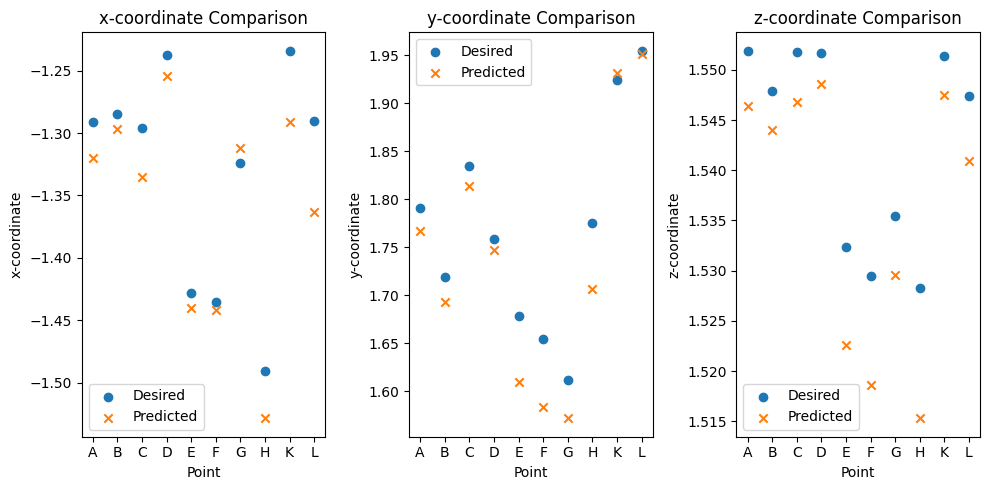

In [ ]:
import matplotlib.pyplot as plt

# Define point names (A, B, C, ...)
points = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L']

# Define coordinates (desired and predicted)
desired_x = desired_coordinates[0]
predicted_x = predicted_coordinates[0]

desired_y = desired_coordinates[1]
predicted_y = predicted_coordinates[1]

desired_z = desired_coordinates[2]
predicted_z = predicted_coordinates[2]

# Create scatter plots for each coordinate
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.scatter(points, desired_x, label='Desired')
plt.scatter(points, predicted_x, label='Predicted', marker='x')
plt.xlabel('Point')
plt.ylabel('x-coordinate')
plt.title('x-coordinate Comparison')
plt.legend()

plt.subplot(132)
plt.scatter(points, desired_y, label='Desired')
plt.scatter(points, predicted_y, label='Predicted', marker='x')
plt.xlabel('Point')
plt.ylabel('y-coordinate')
plt.title('y-coordinate Comparison')
plt.legend()

plt.subplot(133)
plt.scatter(points, desired_z, label='Desired')
plt.scatter(points, predicted_z, label='Predicted', marker='x')
plt.xlabel('Point')
plt.ylabel('z-coordinate')
plt.title('z-coordinate Comparison')
plt.legend()

plt.tight_layout()
plt.show()


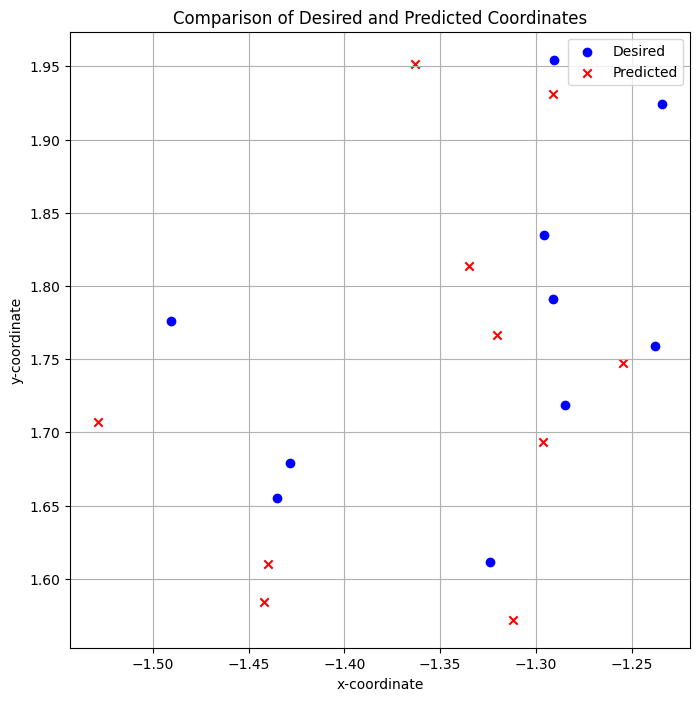

In [ ]:
import matplotlib.pyplot as plt

# Define coordinates (desired and predicted)
desired_x = desired_coordinates[0]
predicted_x = predicted_coordinates[0]

desired_y = desired_coordinates[1]
predicted_y = predicted_coordinates[1]

# Create scatter plot for both x and y coordinates
plt.figure(figsize=(8, 8))

plt.scatter(desired_x, desired_y, label='Desired', marker='o', color='blue')
plt.scatter(predicted_x, predicted_y, label='Predicted', marker='x', color='red')

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Comparison of Desired and Predicted Coordinates')
plt.legend()
plt.grid(True)
plt.show()


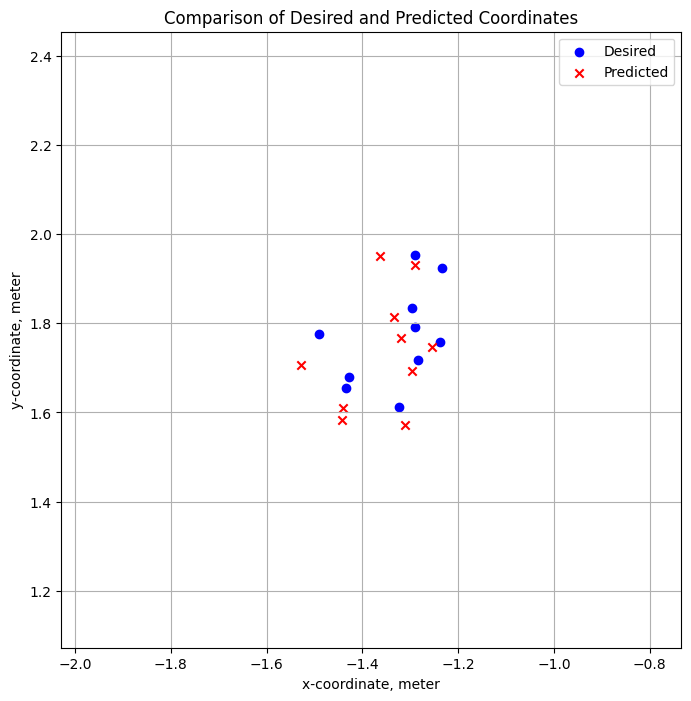

In [ ]:
import matplotlib.pyplot as plt

# Assuming desired_coordinates and predicted_coordinates are defined elsewhere in your code
desired_x = desired_coordinates[0]
predicted_x = predicted_coordinates[0]

desired_y = desired_coordinates[1]
predicted_y = predicted_coordinates[1]

# Create scatter plot for both x and y coordinates
plt.figure(figsize=(8, 8))

plt.scatter(desired_x, desired_y, label='Desired', marker='o', color='blue')
plt.scatter(predicted_x, predicted_y, label='Predicted', marker='x', color='red')

plt.xlabel('x-coordinate, meter')
plt.ylabel('y-coordinate, meter')
plt.title('Comparison of Desired and Predicted Coordinates')
plt.legend()
plt.grid(True)

# Adjust the axes limits to zoom out
plt.xlim(min(min(desired_x), min(predicted_x)) - 0.5, max(max(desired_x), max(predicted_x)) + 0.5)
plt.ylim(min(min(desired_y), min(predicted_y)) - 0.5, max(max(desired_y), max(predicted_y)) + 0.5)

# Adjust the axes limits to start from -0.5
# plt.xlim(-0.5, max(max(desired_x), max(predicted_x)) + 1)
# plt.ylim(-0.5, max(max(desired_y), max(predicted_y)) + 1)


plt.show()


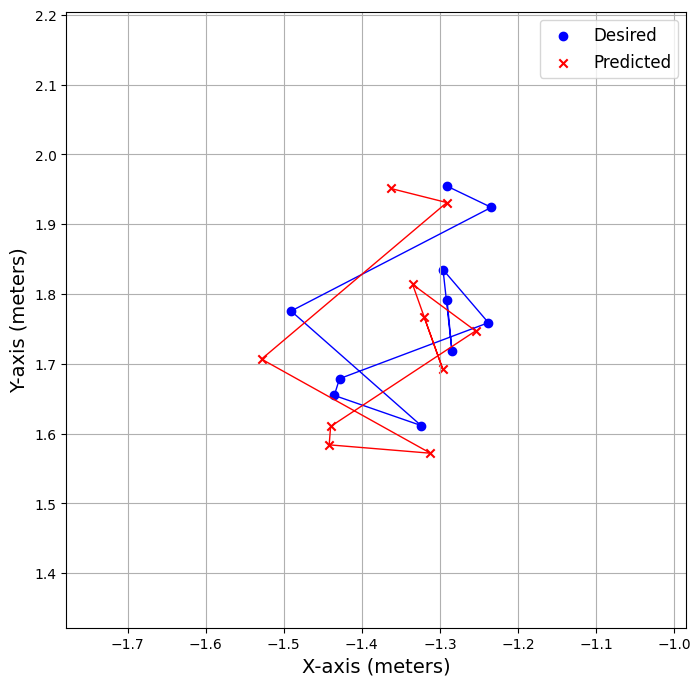

In [ ]:
import matplotlib.pyplot as plt

# Assuming desired_coordinates and predicted_coordinates are defined elsewhere in your code
desired_x = desired_coordinates[0]
predicted_x = predicted_coordinates[0]

desired_y = desired_coordinates[1]
predicted_y = predicted_coordinates[1]

# Create scatter plot for both x and y coordinates
plt.figure(figsize=(8, 8))

plt.scatter(desired_x, desired_y, label='Desired', marker='o', color='blue')
plt.scatter(predicted_x, predicted_y, label='Predicted', marker='x', color='red')

# Connect the desired points with a thin blue line
plt.plot(desired_x, desired_y, color='blue', linestyle='-', linewidth=1)

# Connect the predicted points with a thin reddish line
plt.plot(predicted_x, predicted_y, color='red', linestyle='-', linewidth=1)

plt.xlabel('X-axis (meters)', fontsize=14)
plt.ylabel('Y-axis (meters)', fontsize=14)
#plt.title('Comparison of Desired and Predicted Coordinates', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Adjust the axes limits to zoom out
plt.xlim(min(min(desired_x), min(predicted_x)) - 0.25, max(max(desired_x), max(predicted_x)) + 0.25)
plt.ylim(min(min(desired_y), min(predicted_y)) - 0.25, max(max(desired_y), max(predicted_y)) + 0.25)

plt.show()


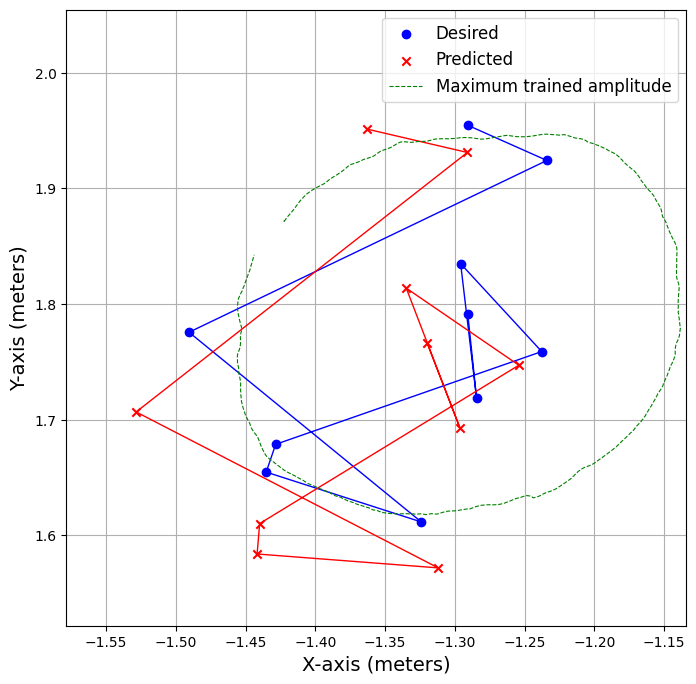

In [ ]:
import matplotlib.pyplot as plt

# Assuming desired_coordinates and predicted_coordinates are defined elsewhere in your code
desired_x = desired_coordinates[0]
predicted_x = predicted_coordinates[0]

desired_y = desired_coordinates[1]
predicted_y = predicted_coordinates[1]

# Create scatter plot for both x and y coordinates
plt.figure(figsize=(8, 8))

plt.scatter(desired_x, desired_y, label='Desired', marker='o', color='blue')
plt.scatter(predicted_x, predicted_y, label='Predicted', marker='x', color='red')

# Connect the desired points with a thin blue line
plt.plot(desired_x, desired_y, color='blue', linestyle='-', linewidth=1)

# Connect the predicted points with a thin reddish line
plt.plot(predicted_x, predicted_y, color='red', linestyle='-', linewidth=1)

plt.xlabel('X-axis (meters)', fontsize=14)
plt.ylabel('Y-axis (meters)', fontsize=14)
#plt.title('Comparison of Desired and Predicted Coordinates', fontsize=14)

plt.grid(True)

# Adjust the axes limits to zoom out
plt.xlim(min(min(desired_x), min(predicted_x))-0.05, max(max(desired_x), max(predicted_x)) + 0.10)
plt.ylim(min(min(desired_y), min(predicted_y))-0.05, max(max(desired_y), max(predicted_y)) + 0.10)

# Plot x and y coordinates from the DataFrame
plt.plot(target120_equal[0], target120_equal[2], label='Maximum trained amplitude', linestyle='--', linewidth=0.8, color='green')
plt.legend(fontsize=12)
plt.show()

Ridge model:

In [ ]:
#Ridge model
motor_angles_pred = models[1][1].predict(X_test_optitrack)
print(motor_angles_pred)

[[ 0.1400108  -0.06824276 -0.14006746  0.07679576]
 [-0.31717281 -0.65699544  0.3171672   0.66849857]
 [ 0.40517775  0.29515381 -0.40526655 -0.28821161]
 [ 0.28971131 -0.69317934 -0.28969053  0.69702541]
 [-1.60376404  0.08793655  1.60362549 -0.0571435 ]
 [-1.81710027 -0.04215215  1.81696888  0.07498353]
 [-1.33285236 -1.16903355  1.33286849  1.19073196]
 [-1.37183118  1.26137609  1.37156598 -1.22807778]
 [ 1.45521258  0.51427409 -1.45528815 -0.51929132]
 [ 1.26711793  1.14960165 -1.26727356 -1.14939047]]


In [ ]:
pred_motor_degrees = np.degrees(motor_angles_pred)
print(pred_motor_degrees)

[[   8.02202769   -3.91002236   -8.02527459    4.40007309]
 [ -18.17266359  -37.64306593   18.17234185   38.30214669]
 [  23.21497503   16.91106767  -23.22006315  -16.51330903]
 [  16.59923561  -39.71625036  -16.59804445   39.93661441]
 [ -91.88891087    5.03839291   91.8809724    -3.27408129]
 [-104.11217627   -2.41514009  104.10464832    4.29623977]
 [ -76.36681468  -66.98068831   76.36773933   68.22391604]
 [ -78.60013665   72.27152643   78.58494196  -70.3636738 ]
 [  83.37753922   29.46573488  -83.38186873  -29.75320105]
 [  72.60050981   65.86732239  -72.60942655  -65.85522311]]


In [ ]:
#for ridge model excel table:
import pandas as pd

# Define the motor output as a NumPy array
motor_output = [
    [8.02202769, -3.91002236, -8.02527459, 4.40007309],
    [-18.17266359, -37.64306593, 18.17234185, 38.30214669],
    [23.21497503, 16.91106767, -23.22006315, -16.51330903],
    [16.59923561, -39.71625036, -16.59804445, 39.93661441],
    [-91.88891087, 5.03839291, 91.8809724, -3.27408129],
    [-104.11217627, -2.41514009, 104.10464832, 4.29623977],
    [-76.36681468, -66.98068831, 76.36773933, 68.22391604],
    [-78.60013665, 72.27152643, 78.58494196, -70.3636738],
    [83.37753922, 29.46573488, -83.38186873, -29.75320105],
    [72.60050981, 65.86732239, -72.60942655, -65.85522311]
]

motor_output_transposed = list(zip(*motor_output))
# Define the column names for the desired format
column_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L']

# Create a DataFrame with the motor output
df = pd.DataFrame(motor_output_transposed, columns=column_names)

# Add the 'm' prefix to the index (m1, m2, m3, ...)
df.index = ['m'+str(i+1) for i in range(len(df))]

# Display the DataFrame
print(df)
df.to_excel('/content/drive/MyDrive/Tensegrity_ML/motor_output.xlsx', index=False)

           A          B          C          D          E           F  \
m1  8.022028 -18.172664  23.214975  16.599236 -91.888911 -104.112176   
m2 -3.910022 -37.643066  16.911068 -39.716250   5.038393   -2.415140   
m3 -8.025275  18.172342 -23.220063 -16.598044  91.880972  104.104648   
m4  4.400073  38.302147 -16.513309  39.936614  -3.274081    4.296240   

            G          H          K          L  
m1 -76.366815 -78.600137  83.377539  72.600510  
m2 -66.980688  72.271526  29.465735  65.867322  
m3  76.367739  78.584942 -83.381869 -72.609427  
m4  68.223916 -70.363674 -29.753201 -65.855223  


In [ ]:
#for Raspberry Pi run
motor_output = [
    [8.02202769, -3.91002236, -8.02527459, 4.40007309],
    [-18.17266359, -37.64306593, 18.17234185, 38.30214669],
    [23.21497503, 16.91106767, -23.22006315, -16.51330903],
    [16.59923561, -39.71625036, -16.59804445, 39.93661441],
    [-91.88891087, 5.03839291, 91.8809724, -3.27408129],
    [-104.11217627, -2.41514009, 104.10464832, 4.29623977],
    [-76.36681468, -66.98068831, 76.36773933, 68.22391604],
    [-78.60013665, 72.27152643, 78.58494196, -70.3636738],
    [83.37753922, 29.46573488, -83.38186873, -29.75320105],
    [72.60050981, 65.86732239, -72.60942655, -65.85522311]
]

# Assuming the motor_output list is flat, flatten it
flat_motor_output = [val for sublist in motor_output for val in sublist]

# Generate variable names and assign values
for i, value in enumerate(flat_motor_output, start=1):
    globals()[f"target_angle{i}"] = value

# Print the generated variables
for i in range(1, 41):
    print(f"target_angle{i} =", globals()[f"target_angle{i}"])


target_angle1 = 8.02202769
target_angle2 = -3.91002236
target_angle3 = -8.02527459
target_angle4 = 4.40007309
target_angle5 = -18.17266359
target_angle6 = -37.64306593
target_angle7 = 18.17234185
target_angle8 = 38.30214669
target_angle9 = 23.21497503
target_angle10 = 16.91106767
target_angle11 = -23.22006315
target_angle12 = -16.51330903
target_angle13 = 16.59923561
target_angle14 = -39.71625036
target_angle15 = -16.59804445
target_angle16 = 39.93661441
target_angle17 = -91.88891087
target_angle18 = 5.03839291
target_angle19 = 91.8809724
target_angle20 = -3.27408129
target_angle21 = -104.11217627
target_angle22 = -2.41514009
target_angle23 = 104.10464832
target_angle24 = 4.29623977
target_angle25 = -76.36681468
target_angle26 = -66.98068831
target_angle27 = 76.36773933
target_angle28 = 68.22391604
target_angle29 = -78.60013665
target_angle30 = 72.27152643
target_angle31 = 78.58494196
target_angle32 = -70.3636738
target_angle33 = 83.37753922
target_angle34 = 29.46573488
target_angle35 

In [ ]:
# Define the desired and predicted coordinates as NumPy arrays
desired_coordinates = np.array([
    [-1.2908, -1.2845, -1.29593, -1.2378, -1.4285, -1.4353, -1.3241, -1.4906, -1.2341, -1.2906],
    [1.7913, 1.7186, 1.83497, 1.759, 1.6788, 1.6548, 1.6117, 1.7757, 1.9242, 1.9545],
    [1.5519, 1.5479, 1.5518, 1.5517, 1.5324, 1.5295, 1.5354, 1.5283, 1.5514, 1.5474]
])


predicted_coordinates = np.array([
        [-1.3184, -1.2991, -1.3293, -1.2652, -1.4145, -1.4181, -1.3117, -1.4871, -1.2928, -1.3502],
    [1.7712, 1.7108, 1.80897, 1.7558, 1.641, 1.6177, 1.6097, 1.5229, 1.9056, 1.9209],
    [1.5448, 1.5433, 1.5456, 1.5472, 1.5274, 1.52497, 1.5341, 1.71444, 1.5478, 1.5428]
])


# Calculate Absolute Errors
absolute_errors = np.abs(desired_coordinates - predicted_coordinates)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(absolute_errors, axis=1)

# Calculate Percentage Error
mean_desired_values = np.mean(desired_coordinates, axis=1)
percentage_error = (mae / mean_desired_values) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Percentage Error: {percentage_error}")


Mean Absolute Error (MAE): [0.026837 0.0439   0.022757]
Percentage Error: [-2.01596577  2.47972584  1.47507406]


In [ ]:
Mean Absolute Error (MAE): [0.029406 0.034087 0.00674 ]
Percentage Error: [-2.20894621  1.92543086  0.43687653]

predicted_coordinates = np.array([
    [-1.3201, -1.2965, -1.3349, -1.2542, -1.43999, -1.4418, -1.312, -1.5285, -1.2911, -1.363],
    [1.7668, 1.6932, 1.8138, 1.7472, 1.6103, 1.584, 1.572, 1.7068, 1.9311, 1.9513],
    [1.5464, 1.544, 1.5468, 1.5486, 1.5226, 1.5186, 1.5296, 1.5153, 1.5475, 1.5409]
])